# Dissertation Analysis

In [43]:
#Import respective python libraries needed.
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
import imblearn
from imblearn.under_sampling import RandomUnderSampler 
undersample = RandomUnderSampler(sampling_strategy=0.5)
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import statsmodels.api as sm 
from sklearn.impute import SimpleImputer 

In [44]:
#Load file
rtd = pd.read_csv('Cleaned_data.csv')

Exploratory Analysis

In [45]:
import string
from pandas.core.arrays.string_ import StringArray
#Load file
rtd = pd.read_csv('Cleaned_data.csv')


for i in range(5, len(rtd.axes[1])-1):
  if isinstance(rtd.iloc[:,i].dtypes, object):
    rtd.iloc[:,i] = pd.to_numeric(rtd.iloc[:,i], errors='coerce')

#remove nan
rtd.replace('', np.nan, inplace=True)
rtd.dropna(inplace=True, how='any')

rtd_1=rtd.iloc[:,5:len(rtd.axes[1])]

rtd_1.dropna(inplace=True)
#rtd_1[rtd_1['DegreeGPA'].isna()]
rtd[rtd['DegreeGPA'].isna()]

,ID,Entry_Term,DegreeDate,DegreeEarned,DegreeMajor,DegreeGPA,HSGPA,ACTMath,ACTEnglish,Gender,...,FirstSemGPA,FirstYearGPA,SecondYearGPA,SixyearCompletion,FirstYrCalcorHigherCompletion,FirstYrStEMRetention,SecondYrSTEMRetention,FirstYrEarnedCreditHours,SecondYrEarnedCreditHours,STEMDegreeCompletion


In [5]:
##checking the data
print(rtd.describe())
print(rtd.info())

                  ID    DegreeGPA        HSGPA      ACTMath   ACTEnglish  \
count    7226.000000  7226.000000  7226.000000  7226.000000  7226.000000   
mean   494218.639496     3.176986     3.614575    26.804318    27.964296   
std    286303.534021     0.476033     0.313300     3.717634     4.459100   
min       253.000000     2.003000     2.170000    17.000000    14.000000   
25%    247844.000000     2.833000     3.390000    24.000000    24.000000   
50%    488194.500000     3.174000     3.670000    27.000000    28.000000   
75%    738915.750000     3.531000     3.890000    29.000000    32.000000   
max    999825.000000     4.300000     4.000000    36.000000    36.000000   

            Gender         Race  Citizenship    First_Gen    HomeState  ...  \
count  7226.000000  7226.000000  7226.000000  7226.000000  7226.000000  ...   
mean      0.579851     5.829781     0.984362     0.190147     0.896623  ...   
std       0.493617     2.146168     0.124079     0.392444     0.304471  ...   

In [6]:
rtd.describe()

,ID,DegreeGPA,HSGPA,ACTMath,ACTEnglish,Gender,Race,Citizenship,First_Gen,HomeState,...,FirstSemGPA,FirstYearGPA,SecondYearGPA,SixyearCompletion,FirstYrCalcorHigherCompletion,FirstYrStEMRetention,SecondYrSTEMRetention,FirstYrEarnedCreditHours,SecondYrEarnedCreditHours,STEMDegreeCompletion
count,7226.000000,7226.000000,7226.000000,7226.000000,7226.000000,7226.000000,7226.000000,7226.000000,7226.000000,7226.000000,...,7226.000000,7226.000000,7226.000000,7226.000000,7226.000000,7226.000000,7226.000000,7226.000000,7226.000000,7226.000000
mean,494218.639496,3.176986,3.614575,26.804318,27.964296,0.579851,5.829781,0.984362,0.190147,0.896623,...,3.152521,3.183803,3.140560,0.972876,0.707445,0.793939,0.697896,25.372405,53.627456,0.645309
std,286303.534021,0.476033,0.313300,3.717634,4.459100,0.493617,2.146168,0.124079,0.392444,0.304471,...,0.716561,0.595982,0.537664,0.162457,0.454967,0.404503,0.459202,6.671375,8.952355,0.478453
min,253.000000,2.003000,2.170000,17.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,247844.000000,2.833000,3.390000,24.000000,24.000000,0.000000,6.000000,1.000000,0.000000,1.000000,...,2.723000,2.800500,2.764000,1.000000,0.000000,1.000000,0.000000,23.000000,48.000000,0.000000
50%,488194.500000,3.174000,3.670000,27.000000,28.000000,1.000000,7.000000,1.000000,0.000000,1.000000,...,3.250000,3.240000,3.160500,1.000000,1.000000,1.000000,1.000000,28.000000,56.000000,1.000000
75%,738915.750000,3.531000,3.890000,29.000000,32.000000,1.000000,7.000000,1.000000,0.000000,1.000000,...,3.740000,3.666000,3.557000,1.000000,1.000000,1.000000,1.000000,30.000000,60.000000,1.000000
max,999825.000000,4.300000,4.000000,36.000000,36.000000,1.000000,8.000000,1.000000,1.000000,1.000000,...,4.300000,4.300000,4.300000,1.000000,1.000000,1.000000,1.000000,39.000000,84.000000,1.000000


In [7]:
# count the number of STEM degree completion,(STEMDegreeCompletion=1) represents gradauted with STEM degree, (STEMDegreeCompletion=0) represents did not graduate with STEM degree
rtd['STEMDegreeCompletion'].value_counts()

1    4663
0    2563
Name: STEMDegreeCompletion, dtype: int64

In [8]:
rtd['Gender'].value_counts()

1    4190
0    3036
Name: Gender, dtype: int64

In [9]:
rtd['Race'].value_counts()

7    5376
2     643
1     515
3     468
6     172
8      28
0      17
5       5
4       2
Name: Race, dtype: int64

In [16]:
rtd['First_Gen'].value_counts()

0    5852
1    1374
Name: First_Gen, dtype: int64

In [17]:
rtd['HomeState'].value_counts()

1    6479
0     747
Name: HomeState, dtype: int64

In [13]:
rtd['PELL'].value_counts()

0    5765
1    1461
Name: PELL, dtype: int64

In [14]:
rtd['Loan'].value_counts()

0    5220
1    2006
Name: Loan, dtype: int64

In [15]:
rtd['TOPS'].value_counts()

1    6879
0     347
Name: TOPS, dtype: int64

In [85]:
rtd['CampHousing'].value_counts()

0    7214
1      12
Name: CampHousing, dtype: int64

In [86]:
rtd['Greek'].value_counts()

0    5317
1    1909
Name: Greek, dtype: int64

In [142]:
rtd[rtd['Entry_Term'] == 'Fall2012'].describe()

,ID,DegreeGPA,HSGPA,ACTMath,ACTEnglish,Gender,Race,Citizenship,First_Gen,HomeState,EFC,FamilyIncome,FatherEdLevel,MotherEdLevel,PELL,Loan,TOPS,CampHousing,Greek,FirstSemGPA,FirstYearGPA,SecondYearGPA,SixyearCompletion,FirstYrCalcorHigherCompletion,FirstYrStEMRetention,SecondYrSTEMRetention,FirstYrEarnedCreditHours,SecondYrEarnedCreditHours,STEMDegreeCompletion
count,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.00000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000
mean,490502.066810,3.126034,3.595453,26.854167,27.670977,0.588362,5.846983,0.982040,0.219109,0.885776,31913.103448,149132.558908,3.330460,3.353448,0.203305,0.276580,0.949713,0.000718,0.268678,3.057859,3.102481,3.09680,0.961207,0.722701,0.765086,0.695402,27.890805,56.138649,0.635776
std,284731.582395,0.474525,0.318509,3.665115,4.373743,0.492307,2.129591,0.132853,0.413791,0.318198,31284.284065,138940.971143,1.669274,1.532327,0.402602,0.447468,0.218616,0.026803,0.443431,0.734326,0.635334,0.53990,0.193171,0.447826,0.424097,0.460402,4.830960,8.151788,0.481385
min,888.000000,2.004000,2.170000,18.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.14800,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,241052.500000,2.771750,3.380000,24.000000,24.000000,0.000000,7.000000,1.000000,0.000000,1.000000,6647.250000,63590.750000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.597000,2.692000,2.70725,1.000000,0.000000,1.000000,0.000000,26.000000,53.000000,0.000000
50%,487737.500000,3.117500,3.640000,26.000000,28.000000,1.000000,7.000000,1.000000,0.000000,1.000000,22101.000000,116677.000000,4.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.187000,3.161000,3.10700,1.000000,1.000000,1.000000,1.000000,29.000000,57.000000,1.000000
75%,720693.250000,3.496500,3.870000,29.000000,31.000000,1.000000,7.000000,1.000000,0.000000,1.000000,48602.000000,186734.250000,4.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,3.647000,3.612000,3.52625,1.000000,1.000000,1.000000,1.000000,31.000000,61.000000,1.000000
max,999123.000000,4.074000,4.000000,36.000000,36.000000,1.000000,8.000000,1.000000,1.000000,1.000000,99999.000000,999999.000000,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.00000,1.000000,1.000000,1.000000,1.000000,39.000000,78.000000,1.000000


In [170]:
print(rtd['STEMDegreeCompletion'].value_counts([rtd['Entry_Term'] == 'Fall2012']))
rtd['DegreeMajor'].value_counts([rtd['Entry_Term'] == 'Fall2012'])
pd.set_option('display.max_rows', 500)
rtd.DegreeMajor.value_counts([rtd['Entry_Term'] == 'Fall2012'])

1    0.645309
0    0.354691
Name: STEMDegreeCompletion, dtype: float64


BIOL      0.153197
ME        0.064489
KIN       0.063936
CHE       0.059923
CM        0.057570
CE        0.048575
PETE      0.047606
CSC       0.042485
EE        0.029200
IE        0.024356
MKT       0.024356
PSYCS     0.023941
BE        0.023526
GBUS      0.019928
ACCT      0.019651
BCH       0.019651
MATH      0.017991
FIN       0.016330
ISDS      0.013424
SOCL      0.013147
EVEG      0.012732
IS        0.012040
CHEM      0.011210
POLI      0.010518
MGT       0.010102
MBIO      0.008995
ENGL      0.008719
GEOLP     0.008303
MC        0.008165
PHYS      0.007888
EEC       0.007611
CES       0.007473
NREM      0.007058
COMD      0.006919
SPADM     0.006781
NFS       0.006366
HIST      0.005812
ANTH      0.005674
CMST      0.004705
ELED      0.004567
ANMLS     0.004152
CFS       0.003875
STAR      0.003875
PHIL      0.003598
ITF       0.003598
LIBAR     0.002906
ECONS     0.002906
INTL      0.002491
ADP       0.002214
AGBU      0.002076
SPAN      0.001937
ENSYS     0.001937
TAM       0.

In [143]:
rtd[rtd['Entry_Term'] == 'Fall2013'].describe()

,ID,DegreeGPA,HSGPA,ACTMath,ACTEnglish,Gender,Race,Citizenship,First_Gen,HomeState,EFC,FamilyIncome,FatherEdLevel,MotherEdLevel,PELL,Loan,TOPS,CampHousing,Greek,FirstSemGPA,FirstYearGPA,SecondYearGPA,SixyearCompletion,FirstYrCalcorHigherCompletion,FirstYrStEMRetention,SecondYrSTEMRetention,FirstYrEarnedCreditHours,SecondYrEarnedCreditHours,STEMDegreeCompletion
count,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000
mean,492609.058993,3.160094,3.624734,26.907194,27.961151,0.594245,5.791367,0.983453,0.211511,0.907914,30600.156115,143513.908633,3.324460,3.361871,0.218705,0.277698,0.956835,0.000719,0.245324,3.179380,3.183007,3.137396,0.955396,0.752518,0.795683,0.706475,13.990647,42.040288,0.661151
std,285986.959424,0.484232,0.312681,3.633797,4.401379,0.491214,2.167815,0.127611,0.408527,0.289252,31387.563974,139318.537349,1.638861,1.514266,0.413517,0.448025,0.203303,0.026822,0.430434,0.697025,0.602078,0.544384,0.206508,0.431704,0.403346,0.455541,2.569534,6.092268,0.473489
min,712.000000,2.025000,2.320000,17.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.214000,0.703000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,251652.750000,2.794750,3.412500,25.000000,24.000000,0.000000,6.000000,1.000000,0.000000,1.000000,4814.750000,56904.750000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.750000,2.827000,2.754000,1.000000,1.000000,1.000000,0.000000,13.000000,39.000000,0.000000
50%,482193.500000,3.163000,3.680000,27.000000,28.000000,1.000000,7.000000,1.000000,0.000000,1.000000,20040.500000,112971.000000,4.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.266000,3.241000,3.163000,1.000000,1.000000,1.000000,1.000000,14.000000,43.000000,1.000000
75%,733430.750000,3.527750,3.890000,29.000000,32.000000,1.000000,7.000000,1.000000,0.000000,1.000000,44344.000000,177054.500000,4.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.785000,3.678000,3.564750,1.000000,1.000000,1.000000,1.000000,16.000000,46.000000,1.000000
max,999691.000000,4.128000,4.000000,36.000000,36.000000,1.000000,8.000000,1.000000,1.000000,1.000000,99999.000000,999999.000000,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,24.000000,65.000000,1.000000


In [171]:
print(rtd['STEMDegreeCompletion'].value_counts([rtd['Entry_Term'] == 'Fall2013']))
rtd['DegreeMajor'].value_counts([rtd['Entry_Term'] == 'Fall2013'])
pd.set_option('display.max_rows', 500)
rtd.DegreeMajor.value_counts([rtd['Entry_Term'] == 'Fall2013'])

1    0.645309
0    0.354691
Name: STEMDegreeCompletion, dtype: float64


BIOL      0.153197
ME        0.064489
KIN       0.063936
CHE       0.059923
CM        0.057570
CE        0.048575
PETE      0.047606
CSC       0.042485
EE        0.029200
IE        0.024356
MKT       0.024356
PSYCS     0.023941
BE        0.023526
GBUS      0.019928
ACCT      0.019651
BCH       0.019651
MATH      0.017991
FIN       0.016330
ISDS      0.013424
SOCL      0.013147
EVEG      0.012732
IS        0.012040
CHEM      0.011210
POLI      0.010518
MGT       0.010102
MBIO      0.008995
ENGL      0.008719
GEOLP     0.008303
MC        0.008165
PHYS      0.007888
EEC       0.007611
CES       0.007473
NREM      0.007058
COMD      0.006919
SPADM     0.006781
NFS       0.006366
HIST      0.005812
ANTH      0.005674
CMST      0.004705
ELED      0.004567
ANMLS     0.004152
CFS       0.003875
STAR      0.003875
PHIL      0.003598
ITF       0.003598
LIBAR     0.002906
ECONS     0.002906
INTL      0.002491
ADP       0.002214
AGBU      0.002076
SPAN      0.001937
ENSYS     0.001937
TAM       0.

In [152]:
rtd[rtd['Entry_Term'] == 'Fall2014'].describe()

,ID,DegreeGPA,HSGPA,ACTMath,ACTEnglish,Gender,Race,Citizenship,First_Gen,HomeState,EFC,FamilyIncome,FatherEdLevel,MotherEdLevel,PELL,Loan,TOPS,CampHousing,Greek,FirstSemGPA,FirstYearGPA,SecondYearGPA,SixyearCompletion,FirstYrCalcorHigherCompletion,FirstYrStEMRetention,SecondYrSTEMRetention,FirstYrEarnedCreditHours,SecondYrEarnedCreditHours,STEMDegreeCompletion
count,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.00000,1578.000000,1578.000000,1578.000000,1578.000000,1578.0,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000
mean,496256.064639,3.167253,3.622104,26.846008,27.994297,0.589987,5.846641,0.981622,0.192649,0.886565,48520.827630,153913.691381,3.36692,3.450570,0.188847,0.243980,0.943599,0.0,0.271863,3.199033,3.212372,3.152809,0.969582,0.724968,0.838403,0.731939,28.245247,56.241445,0.666667
std,284797.817908,0.479651,0.310061,3.664910,4.482683,0.491992,2.117788,0.134355,0.394505,0.317224,94167.433974,141171.715807,1.65368,1.489904,0.391511,0.429617,0.230767,0.0,0.445061,0.684836,0.558602,0.528397,0.171790,0.446672,0.368197,0.443090,3.367201,6.712929,0.471554
min,1083.000000,2.003000,2.480000,17.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.600000,1.153000,1.363000,0.000000,0.000000,0.000000,0.000000,12.000000,24.000000,0.000000
25%,249871.750000,2.821000,3.400000,25.000000,24.000000,0.000000,6.000000,1.000000,0.000000,1.000000,7297.250000,65036.750000,2.00000,2.000000,0.000000,0.000000,1.000000,0.0,0.000000,2.800000,2.843750,2.798000,1.000000,0.000000,1.000000,0.000000,26.250000,53.000000,0.000000
50%,490999.500000,3.175000,3.680000,27.000000,28.000000,1.000000,7.000000,1.000000,0.000000,1.000000,24641.000000,123789.500000,4.00000,4.000000,0.000000,0.000000,1.000000,0.0,0.000000,3.307000,3.263500,3.190000,1.000000,1.000000,1.000000,1.000000,29.000000,57.000000,1.000000
75%,738355.000000,3.521500,3.890000,29.000000,32.000000,1.000000,7.000000,1.000000,0.000000,1.000000,48909.500000,191791.250000,4.00000,4.000000,0.000000,0.000000,1.000000,0.0,1.000000,3.785000,3.678000,3.564000,1.000000,1.000000,1.000000,1.000000,30.000000,60.000000,1.000000
max,997702.000000,4.216000,4.000000,36.000000,36.000000,1.000000,8.000000,1.000000,1.000000,1.000000,999999.000000,988262.000000,6.00000,6.000000,1.000000,1.000000,1.000000,0.0,1.000000,4.000000,4.000000,4.164000,1.000000,1.000000,1.000000,1.000000,39.000000,82.000000,1.000000


In [172]:
print(rtd['STEMDegreeCompletion'].value_counts([rtd['Entry_Term'] == 'Fall2014']))
rtd['DegreeMajor'].value_counts([rtd['Entry_Term'] == 'Fall2014'])
pd.set_option('display.max_rows', 500)
rtd.DegreeMajor.value_counts([rtd['Entry_Term'] == 'Fall2014'])

1    0.645309
0    0.354691
Name: STEMDegreeCompletion, dtype: float64


BIOL      0.153197
ME        0.064489
KIN       0.063936
CHE       0.059923
CM        0.057570
CE        0.048575
PETE      0.047606
CSC       0.042485
EE        0.029200
IE        0.024356
MKT       0.024356
PSYCS     0.023941
BE        0.023526
GBUS      0.019928
ACCT      0.019651
BCH       0.019651
MATH      0.017991
FIN       0.016330
ISDS      0.013424
SOCL      0.013147
EVEG      0.012732
IS        0.012040
CHEM      0.011210
POLI      0.010518
MGT       0.010102
MBIO      0.008995
ENGL      0.008719
GEOLP     0.008303
MC        0.008165
PHYS      0.007888
EEC       0.007611
CES       0.007473
NREM      0.007058
COMD      0.006919
SPADM     0.006781
NFS       0.006366
HIST      0.005812
ANTH      0.005674
CMST      0.004705
ELED      0.004567
ANMLS     0.004152
CFS       0.003875
STAR      0.003875
PHIL      0.003598
ITF       0.003598
LIBAR     0.002906
ECONS     0.002906
INTL      0.002491
ADP       0.002214
AGBU      0.002076
SPAN      0.001937
ENSYS     0.001937
TAM       0.

In [173]:
rtd[rtd['Entry_Term'] == 'Fall2015'].describe()
rtd['DegreeMajor'].value_counts([rtd['Entry_Term'] == 'Fall2015'])
pd.set_option('display.max_rows', 500)
rtd.DegreeMajor.value_counts([rtd['Entry_Term'] == 'Fall2015'])

BIOL      0.153197
ME        0.064489
KIN       0.063936
CHE       0.059923
CM        0.057570
CE        0.048575
PETE      0.047606
CSC       0.042485
EE        0.029200
IE        0.024356
MKT       0.024356
PSYCS     0.023941
BE        0.023526
GBUS      0.019928
ACCT      0.019651
BCH       0.019651
MATH      0.017991
FIN       0.016330
ISDS      0.013424
SOCL      0.013147
EVEG      0.012732
IS        0.012040
CHEM      0.011210
POLI      0.010518
MGT       0.010102
MBIO      0.008995
ENGL      0.008719
GEOLP     0.008303
MC        0.008165
PHYS      0.007888
EEC       0.007611
CES       0.007473
NREM      0.007058
COMD      0.006919
SPADM     0.006781
NFS       0.006366
HIST      0.005812
ANTH      0.005674
CMST      0.004705
ELED      0.004567
ANMLS     0.004152
CFS       0.003875
STAR      0.003875
PHIL      0.003598
ITF       0.003598
LIBAR     0.002906
ECONS     0.002906
INTL      0.002491
ADP       0.002214
AGBU      0.002076
SPAN      0.001937
ENSYS     0.001937
TAM       0.

In [167]:
print(rtd['STEMDegreeCompletion'].value_counts([rtd['Entry_Term'] == 'Fall2015']))

1    0.645309
0    0.354691
Name: STEMDegreeCompletion, dtype: float64


In [162]:
print(rtd[rtd['Entry_Term'] == 'Fall2016'].describe())

                  ID    DegreeGPA        HSGPA      ACTMath   ACTEnglish  \
count    1400.000000  1400.000000  1400.000000  1400.000000  1400.000000   
mean   498770.547857     3.259876     3.624679    26.642143    28.284286   
std    290274.060968     0.452794     0.305357     3.804526     4.468527   
min      1327.000000     2.108000     2.610000    18.000000    18.000000   
25%    249174.000000     2.936750     3.410000    24.000000    25.000000   
50%    495652.000000     3.244500     3.680000    26.000000    28.000000   
75%    750325.500000     3.604000     3.890000    29.000000    32.000000   
max    999825.000000     4.300000     4.000000    36.000000    36.000000   

            Gender         Race  Citizenship    First_Gen    HomeState  \
count  1400.000000  1400.000000  1400.000000  1400.000000  1400.000000   
mean      0.554286     5.879286     0.990714     0.157857     0.910000   
std       0.497222     2.104592     0.095948     0.364737     0.286284   
min       0.000000 

In [169]:
print(rtd['STEMDegreeCompletion'].value_counts([rtd['Entry_Term'] == 'Fall2016']))
rtd['DegreeMajor'].value_counts([rtd['Entry_Term'] == 'Fall2016'])
pd.set_option('display.max_rows', 500)
rtd.DegreeMajor.value_counts([rtd['Entry_Term'] == 'Fall2016'])

1    0.645309
0    0.354691
Name: STEMDegreeCompletion, dtype: float64


BIOL      0.153197
ME        0.064489
KIN       0.063936
CHE       0.059923
CM        0.057570
CE        0.048575
PETE      0.047606
CSC       0.042485
EE        0.029200
IE        0.024356
MKT       0.024356
PSYCS     0.023941
BE        0.023526
GBUS      0.019928
ACCT      0.019651
BCH       0.019651
MATH      0.017991
FIN       0.016330
ISDS      0.013424
SOCL      0.013147
EVEG      0.012732
IS        0.012040
CHEM      0.011210
POLI      0.010518
MGT       0.010102
MBIO      0.008995
ENGL      0.008719
GEOLP     0.008303
MC        0.008165
PHYS      0.007888
EEC       0.007611
CES       0.007473
NREM      0.007058
COMD      0.006919
SPADM     0.006781
NFS       0.006366
HIST      0.005812
ANTH      0.005674
CMST      0.004705
ELED      0.004567
ANMLS     0.004152
CFS       0.003875
STAR      0.003875
PHIL      0.003598
ITF       0.003598
LIBAR     0.002906
ECONS     0.002906
INTL      0.002491
ADP       0.002214
AGBU      0.002076
SPAN      0.001937
ENSYS     0.001937
TAM       0.

In [7]:
rtd['Entry_Term'].value_counts()

Fall2014    1578
Fall2015    1466
Fall2016    1400
Fall2012    1392
Fall2013    1390
Name: Entry_Term, dtype: int64

In [8]:
rtd['DegreeEarned'].value_counts()

BS         3668
BA          521
BSME        466
BSCHE       433
BSCM        416
BSCE        351
BSPE        229
BSEE        222
BSIE        176
BSBE        170
BSPETE      115
BIS          87
BSEVE        70
BSGEOL       60
BAMC         59
BSCES        54
BSCOMPE      44
BFA          28
BSENVEG      22
BARCH        12
BID          10
BLA           8
BM            2
BME           2
BSW           1
Name: DegreeEarned, dtype: int64

In [9]:
rtd['DegreeMajor'].value_counts()
pd.set_option('display.max_rows', 500)
rtd.DegreeMajor.value_counts()

BIOL      1107
ME         466
KIN        462
CHE        433
CM         416
CE         351
PETE       344
CSC        307
EE         211
MKT        176
IE         176
PSYCS      173
BE         170
GBUS       144
BCH        142
ACCT       142
MATH       130
FIN        118
ISDS        97
SOCL        95
EVEG        92
IS          87
CHEM        81
POLI        76
MGT         73
MBIO        65
ENGL        63
GEOLP       60
MC          59
PHYS        57
EEC         55
CES         54
NREM        51
COMD        50
SPADM       49
NFS         46
HIST        42
ANTH        41
CMST        34
ELED        33
ANMLS       30
STAR        28
CFS         28
PHIL        26
ITF         26
LIBAR       21
ECONS       21
INTL        18
ADP         16
AGBU        15
ENSYS       14
SPAN        14
TAM         14
THTR        12
ARCH        12
PLSYS       11
HRE         11
FREN        11
ID          10
GEOGS        8
LA           8
ECONA        6
ATRN         5
PK3CT        5
DUALC        5
MUSAR        4
GEOGA     

In [10]:
rtd['DegreeDate'].value_counts()

Spring2020    1110
Spring2019    1080
Spring2018     979
Spring2017     899
Spring2016     550
Fall2018       428
Fall2019       396
Fall2020       336
Spring2021     310
Fall2017       304
Fall2016       282
Fall2021        82
Summer2019      77
Summer2018      73
Spring2022      69
Summer2017      67
Summer2020      62
Summer2016      50
Fall2015        42
Summer2021      21
Spring2015       7
Summer2022       1
Summer2015       1
Name: DegreeDate, dtype: int64

In [11]:
#verifying any null data and nan data
rtd.isnull().sum().sum()
rtd.isna().sum().sum()

0

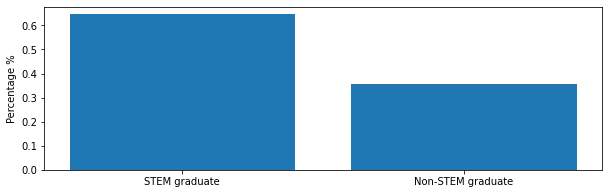

In [12]:
#Percentage of STEM graduates and non STEM graduates
plt.rcParams['figure.figsize'] = (10, 3)
num_data = len(rtd["STEMDegreeCompletion"])
num_grad = len(rtd[rtd["STEMDegreeCompletion"]== 1])
percent_grad = len(rtd[rtd["STEMDegreeCompletion"]== 1])/len(rtd["STEMDegreeCompletion"])
percent_non_grad = 1- percent_grad
label = ["STEM graduate", "Non-STEM graduate"]
percent = [percent_grad, percent_non_grad]
plt.bar(label, percent)
plt.ylabel('Percentage %')
plt.show()

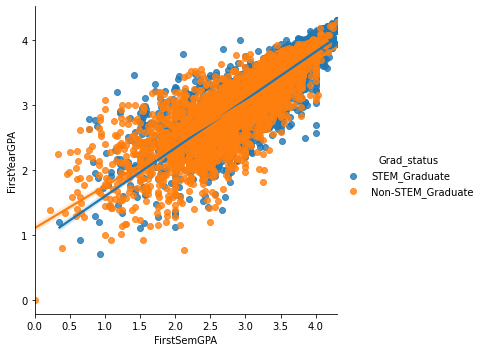

In [13]:
rtd["Grad_status"] = rtd["STEMDegreeCompletion"]
rtd["Grad_status"].replace(1,"STEM_Graduate", inplace = True)
rtd["Grad_status"].replace(0,"Non-STEM_Graduate", inplace = True)
r = sns.lmplot("FirstSemGPA", "FirstYearGPA", data=rtd, hue ='Grad_status')
plt.show()

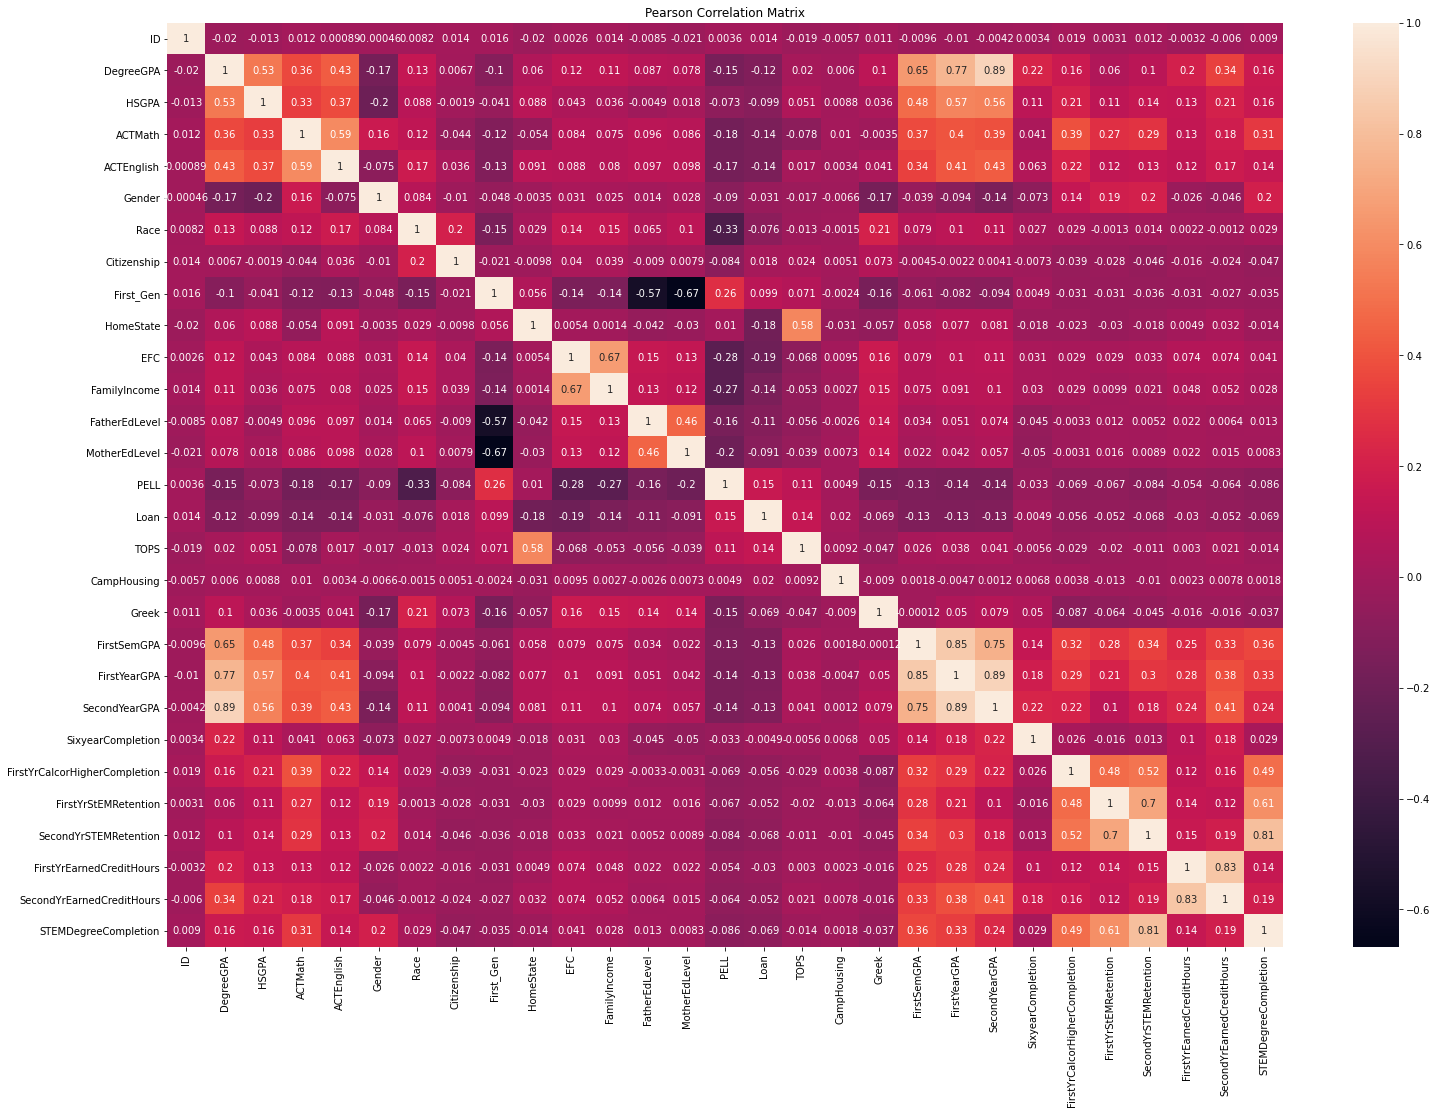

In [14]:
plt.subplots(figsize=(25,17))
sns.heatmap(rtd.corr(), annot=True)
plt.title("Pearson Correlation Matrix")
plt.show()

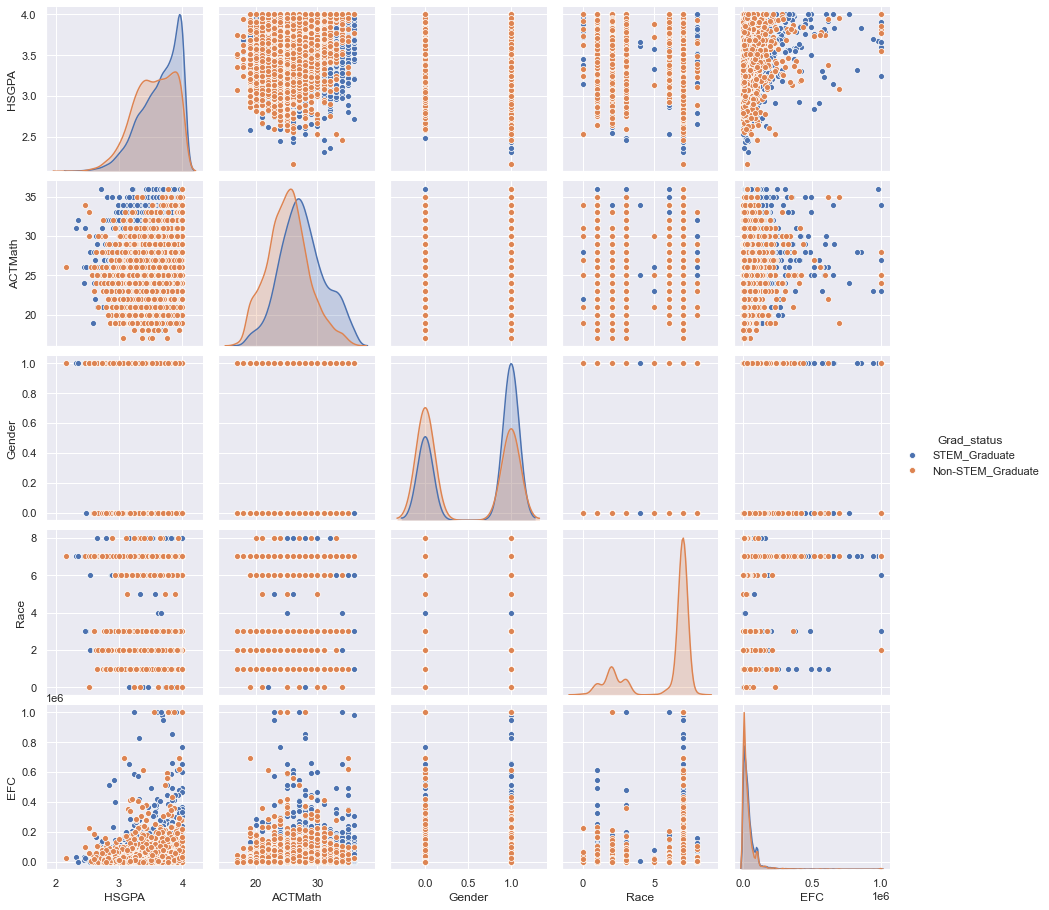

In [15]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
#plt.figure(figsize= (40,15))
sns.pairplot(rtd[["HSGPA","ACTMath","Gender","Race","EFC","Grad_status"]], hue = "Grad_status")
plt.show()

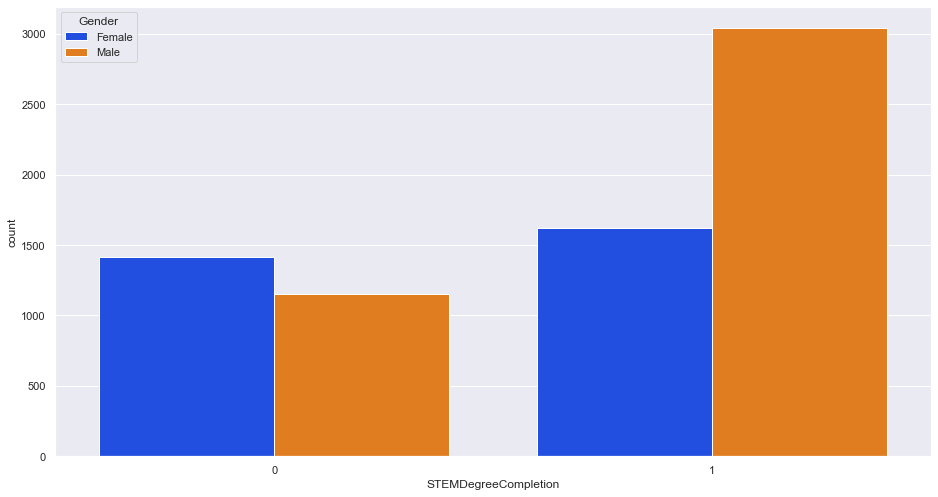

In [16]:
#plt.figure(figsize=(9,5))
rtd['Gender'].unique()
gender_map = {
    1:"Male",
    0:"Female"
    
}

rtd['Gender'] = rtd['Gender'].map(gender_map)
label = ["STEM graduate", "Non-STEM graduate"]
sns.countplot(x='STEMDegreeCompletion', hue='Gender', data=rtd, palette= 'bright')
plt.show()

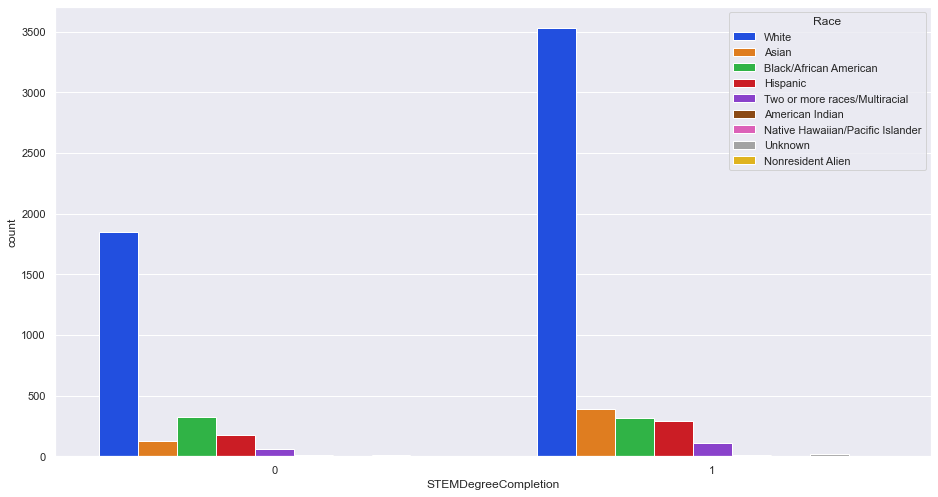

In [17]:
#plt.figure(figsize=(9,5))
rtd['Race'].unique()
Race_map = {
    0:"American Indian",
    1:"Asian",
    2:"Black/African American",
    3:"Hispanic",
    4:"Nonresident Alien",
    5:"Native Hawaiian/Pacific Islander",
    6:"Two or more races/Multiracial",
    7:"White",
    8:"Unknown"
}

rtd['Race'] = rtd['Race'].map(Race_map)
label = ["STEM graduate", "Non-STEM graduate"]
sns.countplot(x='STEMDegreeCompletion', hue='Race', data=rtd, palette= 'bright')
plt.show()

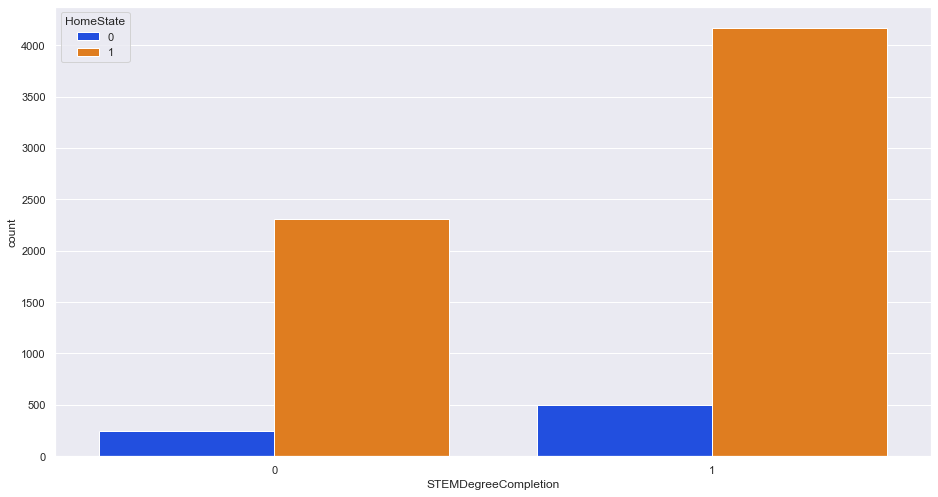

In [18]:
#plt.figure(figsize=(9,5))
rtd['HomeState'].unique()
HomeState_map = {
    0:"Not In-State Resident",
    1:"In-state Resident"
    
}

rtd['Homestate'] = rtd['HomeState'].map(HomeState_map)
label = ["STEM graduate", "Non-STEM graduate"]
sns.countplot(x='STEMDegreeCompletion', hue='HomeState', data=rtd, palette= 'bright')
plt.show()

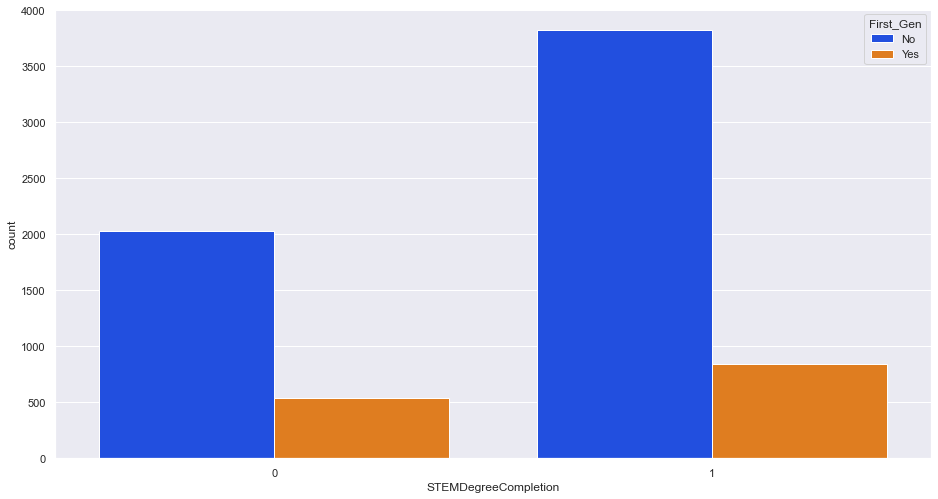

In [19]:
#plt.figure(figsize=(9,5))
rtd['First_Gen'].unique()
First_Gen_map = {
    0:"No",
    1:"Yes"
    
}

rtd['First_Gen'] = rtd['First_Gen'].map(First_Gen_map)
sns.countplot(x='STEMDegreeCompletion', hue='First_Gen', data=rtd, palette= 'bright')
plt.show()

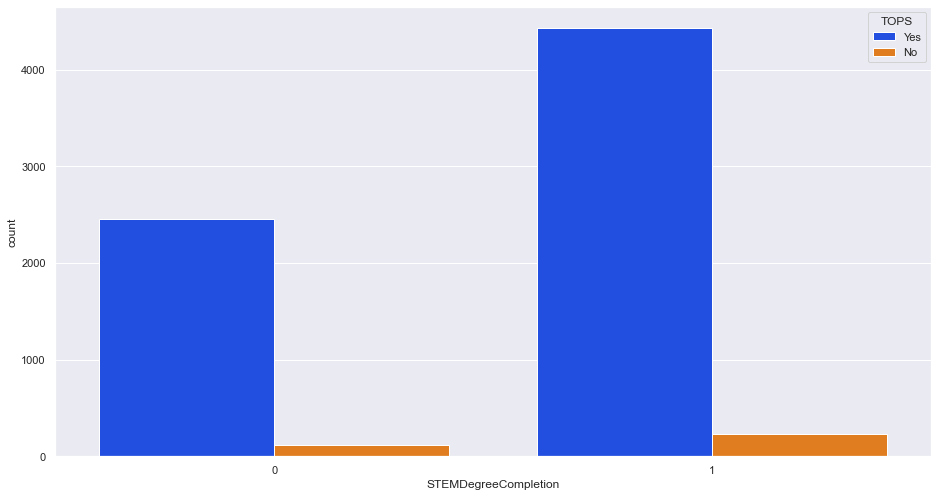

In [20]:
#plt.figure(figsize=(9,5))
rtd['TOPS'].unique()
TOPS_map = {
    0:"No",
    1:"Yes"
    
}

rtd['TOPS'] = rtd['TOPS'].map(TOPS_map)
sns.countplot(x='STEMDegreeCompletion', hue='TOPS', data=rtd, palette= 'bright')
plt.show()

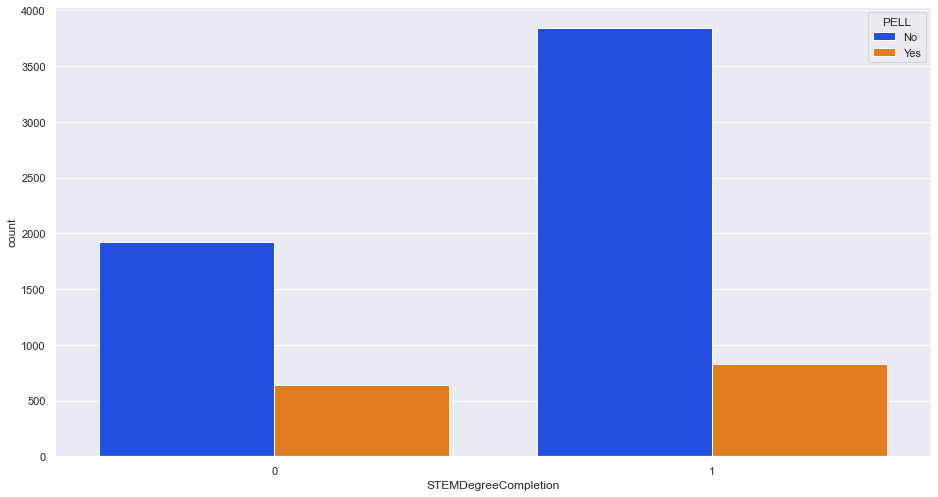

In [21]:
#plt.figure(figsize=(9,5))
rtd['PELL'].unique()
PELL_map = {
    0:"No",
    1:"Yes"
    
}

rtd['PELL'] = rtd['PELL'].map(PELL_map)
sns.countplot(x='STEMDegreeCompletion', hue='PELL', data=rtd, palette= 'bright')
plt.show()

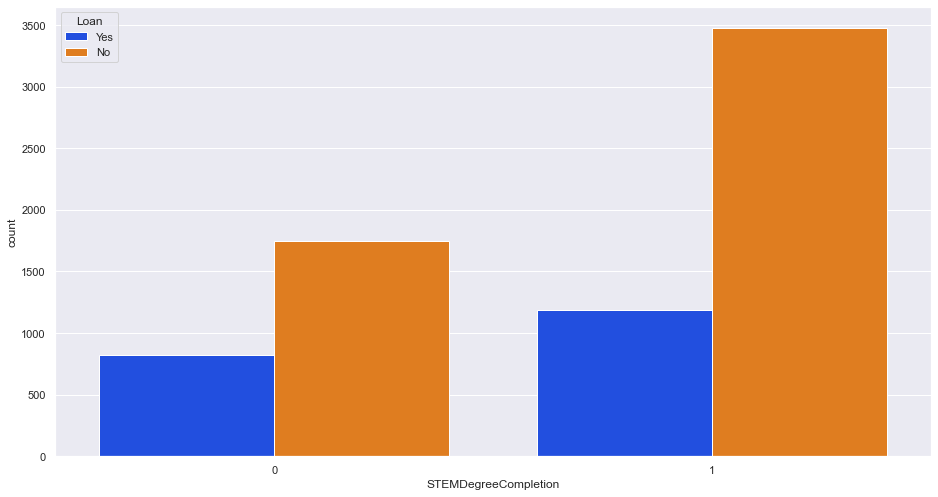

In [22]:
#plt.figure(figsize=(9,5))
rtd['Loan'].unique()
Loan_map = {
    0:"No",
    1:"Yes"
    
}

rtd['Loan'] = rtd['Loan'].map(Loan_map)
sns.countplot(x='STEMDegreeCompletion', hue='Loan', data=rtd, palette= 'bright')
plt.show()

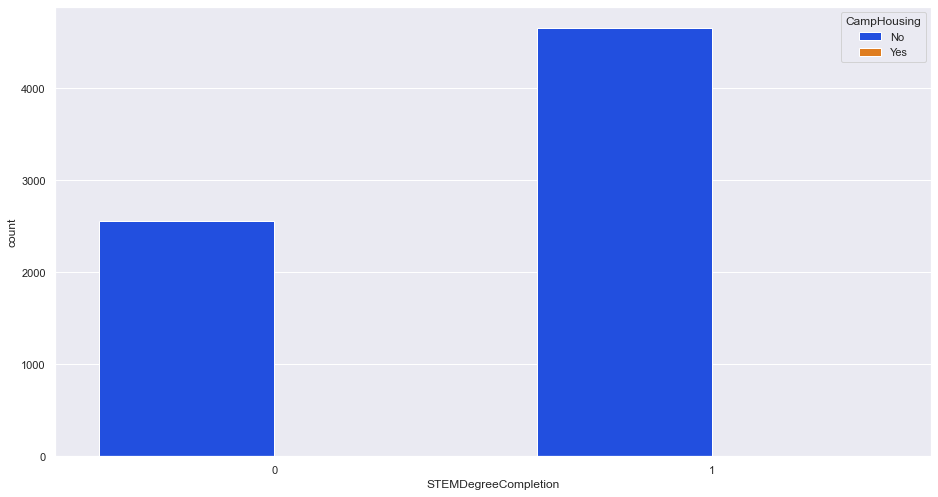

In [23]:
#plt.figure(figsize=(9,5))
rtd['CampHousing'].unique()
CampHousing_map = {
    0:"No",
    1:"Yes"
    
}

rtd['CampHousing'] = rtd['CampHousing'].map(CampHousing_map)
sns.countplot(x='STEMDegreeCompletion', hue='CampHousing', data=rtd, palette= 'bright')
plt.show()

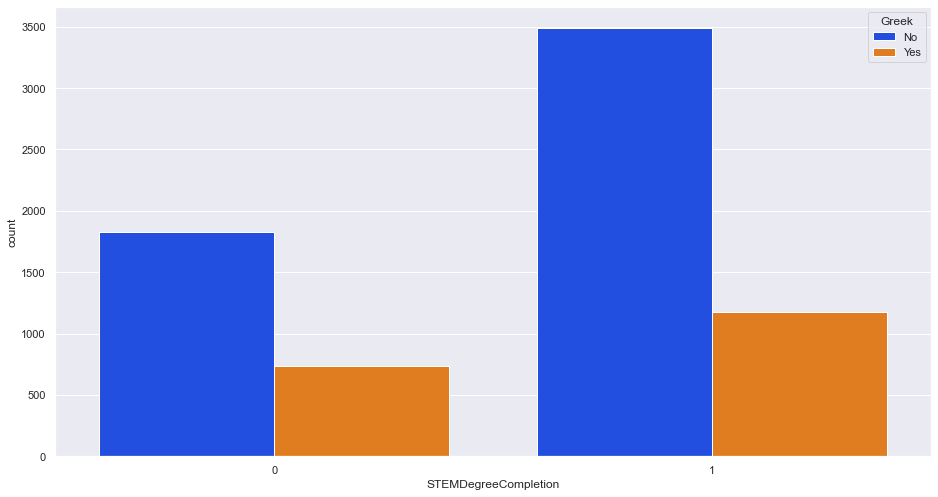

In [24]:
#plt.figure(figsize=(9,5))
rtd['Greek'].unique()
Greek_map = {
    0:"No",
    1:"Yes"
    
}

rtd['Greek'] = rtd['Greek'].map(Greek_map)
sns.countplot(x='STEMDegreeCompletion', hue='Greek', data=rtd, palette= 'bright')
plt.show()

ValueError: min() arg is an empty sequence

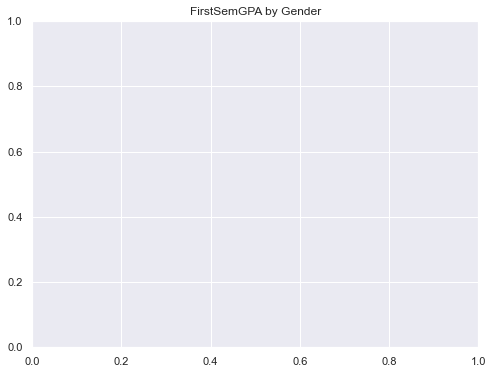

In [25]:
# First Semester GPA vs Gender
rtd['Gender'].unique()
gender_map = {
    1: "Male",
    0: "Female" 
}
rtd['Gender'] = rtd['Gender'].map(gender_map)
plt.figure(figsize = (8,6))
plt.title('FirstSemGPA by Gender')
plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(x='Gender', y='FirstSemGPA', hue='Gender', data=rtd, palette='bright')
plt.show();

ValueError: min() arg is an empty sequence

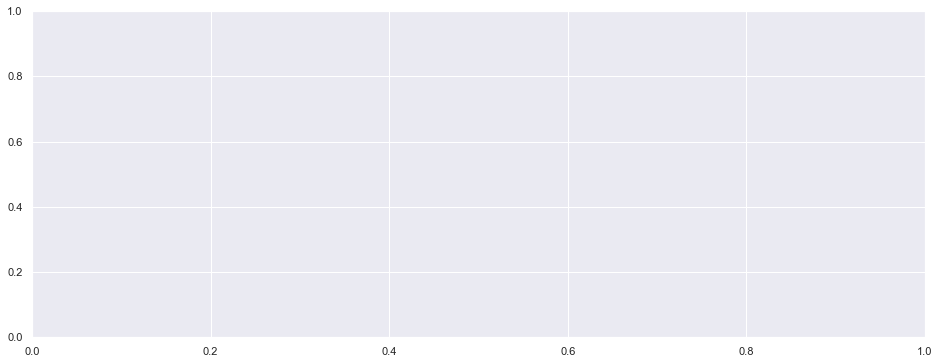

In [26]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width, 6))
    s = sns.boxplot(ax=ax1, x=feature1, y=feature2, hue=feature3,
                    data=rtd, palette='magma')
    s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.show();

boxplot_variation('Race', 'FirstSemGPA', 'Gender')

# Logistic Regression

**Research Question 1: Which pre-college academic, demographic, and college environment variables/factors serve as significant predicters for students who major in STEM completing a STEM degree?**

In [75]:
#Target features
X = rtd_1.loc[:,'HSGPA':'SecondYrEarnedCreditHours']
y = rtd_1['STEMDegreeCompletion']

In [76]:
# logistic regression model
# get independent variables
X = rtd_1[['HSGPA','ACTMath','ACTEnglish','Gender','Race','Citizenship','First_Gen','EFC', 'FamilyIncome', 'FatherEdLevel', 'MotherEdLevel', 'PELL','Loan', 'TOPS', 'CampHousing','Greek','HomeState','FirstSemGPA','FirstYearGPA','SecondYearGPA','SixyearCompletion','FirstYrCalcorHigherCompletion','FirstYrStEMRetention','SecondYrSTEMRetention','FirstYrEarnedCreditHours','SecondYrEarnedCreditHours']]
# to get intercept -- this is optional
X = sm.add_constant(X)
# get response variables
Y = rtd_1[['STEMDegreeCompletion']]
# fit the model with maximum likelihood function
rtd_1_model = sm.Logit(Y, X).fit()
# output message
print(rtd_1_model.summary())

Optimization terminated successfully.
         Current function value: 0.261784
         Iterations 7
                            Logit Regression Results                            
Dep. Variable:     STEMDegreeCompletion   No. Observations:                 7226
Model:                            Logit   Df Residuals:                     7199
Method:                             MLE   Df Model:                           26
Date:                  Thu, 23 Feb 2023   Pseudo R-squ.:                  0.5974
Time:                          00:08:02   Log-Likelihood:                -1891.6
converged:                         True   LL-Null:                       -4699.1
Covariance Type:              nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -6.4351      0.826   

In [77]:
lr1_model = LogisticRegression()
lr1_model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': lr1_model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

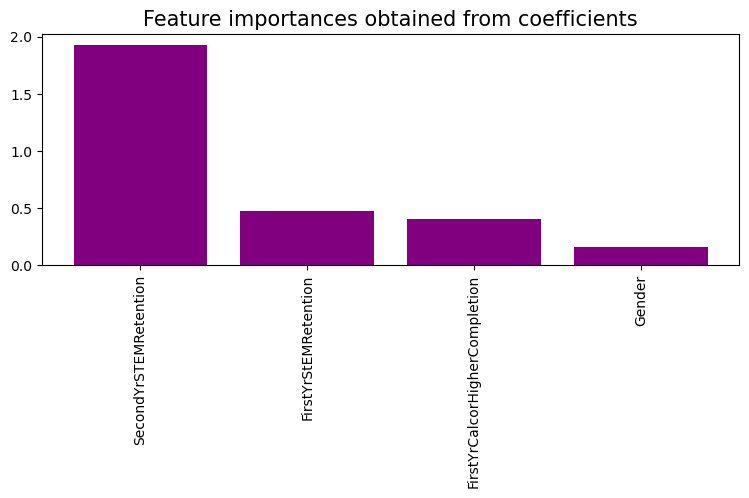

<Figure size 640x480 with 0 Axes>

In [84]:
plt.figure(figsize=(9,3))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='purple')
plt.title('Feature importances obtained from coefficients', size=15)
plt.xticks(rotation='vertical')
plt.show()

plt.savefig("outputfi.jpg")

In [79]:
#Log-odds calculation of feature importance
np.exp(rtd_1_model.params)

const                             0.001604
HSGPA                             0.701872
ACTMath                           1.073787
ACTEnglish                        0.950347
Gender                            1.703541
Race                              1.018001
Citizenship                       0.535365
First_Gen                         1.092469
EFC                               1.000000
FamilyIncome                      1.000000
FatherEdLevel                     1.014236
MotherEdLevel                     0.981048
PELL                              1.015964
Loan                              1.021315
TOPS                              0.919047
CampHousing                       6.788564
Greek                             1.076089
HomeState                         1.057449
FirstSemGPA                       1.208784
FirstYearGPA                      0.784198
SecondYearGPA                     4.053917
SixyearCompletion                 0.956401
FirstYrCalcorHigherCompletion     2.049962
FirstYrStEM

NameError: name 'y_preds' is not defined

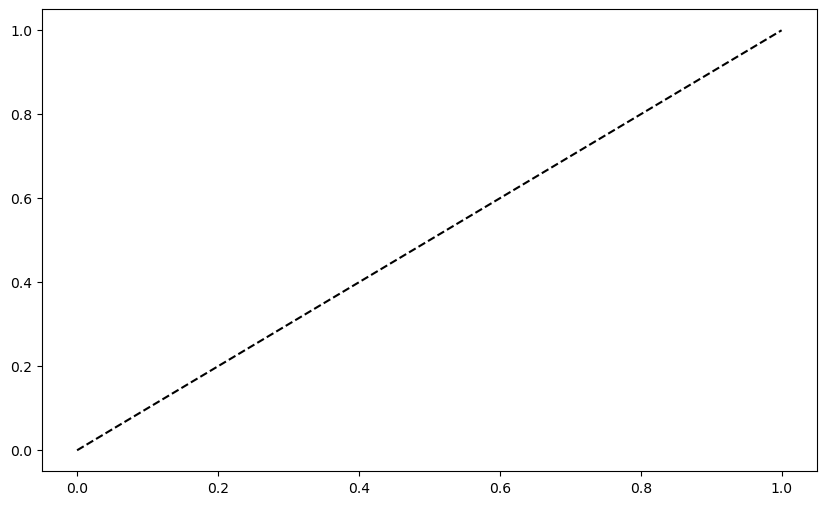

In [81]:
plt.figure(figsize=(10,6))

plt.plot([0,1], [0,1], color='black', linestyle='--')

#Plot logistic regression ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_preds)
auc = round(metrics.roc_auc_score(y_test, y_preds), 4)
plt.plot(fpr,tpr, marker= '.', color='purple',label= "Logistic Regression, AUC="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

plt.savefig("output.jpg")

<Figure size 720x432 with 0 Axes>

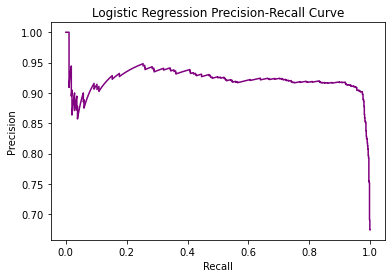

In [71]:
plt.figure(figsize=(10,6))
log = LogisticRegression()
log.fit(X_train, y_train)
# predict probabilities
lr_probs = log.predict_proba(X_test)[:,1]
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, lr_probs)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Logistic Regression Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

plt.savefig("output.jpg")

**Research Question 2: What are the classification accuracy of five supervised machine learning classification algorithms in predicting degree completion of STEM majors: adaptive boosting (ADB), classification & regression trees (CART), random forest (RF), support vector machine (SVM), and extreme gradient boosting (XGB)?** 

In [56]:
categoricals = list(X.select_dtypes('object').columns)
numericals = list(X.select_dtypes('int64').columns)

def encode_cats(categoricals, numericals):
    """
    Takes in a list of categorical columns and a list of numerical columns and returns the dataframe with encoded variables
    """
    ohe = OneHotEncoder(sparse=False, drop='first')
    cat_matrix = ohe.fit_transform(X.loc[:, categoricals])
    X_ohe = pd.DataFrame(cat_matrix,
                         columns=ohe.get_feature_names(categoricals), #create meaningful column names
                         index=X.index) #keep the same index values
    
    return pd.concat([X.loc[:, numericals], X_ohe], axis=1)

In [57]:
X = encode_cats(categoricals, numericals)

In [58]:
def train_test_val_split(X, y):
    """
    Input: X --> array of features, y --> target array
           set aside for testing.
    Output: Features and target split into train, val and test sets. 
            Test size = 20%
            Val size = 25%
            Converted to numpy arrays.
    """
    X, X_test, y, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    # Split train/validate sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

    # Convert to numpy arrays to help with generate indeces below
    X, y = np.array(X), np.array(y)

    return X_train, X_val, X_test, y_train, y_val, y_test

In [59]:
X_train, X_val, X_test, y_train, y_val, y_test = train_test_val_split(X, y)

In [9]:
print(X.shape, X_val.shape, X_train.shape, X_test.shape)

(7226, 18) (1445, 18) (4335, 18) (1446, 18)


In [60]:
def scale_data(X_train, X_val, X_test):
    """
    Input: Features (numpy arrays)
    Output: Scaled data
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_val_scaled, X_test_scaled

In [62]:
X_train_scaled, X_val_scaled, X_test_scaled = scale_data(X_train, X_val, X_test)

In [63]:
def model_score(model_name, model, X_train_scaled, X_val_scaled,
                X_test_scaled, y_train, y_val, y_test, test=True):
    """
    Input: Transformed feature and target sets
    Output: Validation scores. If test=True, includes test scores
    """
    print('Calculating validation score...')

    rtd_1_model = model
    rtd_1_model.fit(X_train_scaled,y_train)
    print(f'{model_name} accuracy score: {rtd_1_model.score(X_val_scaled,y_val):.4}\n')

    if test:
        print("Calculating test score...")
        print(f'{model_name} accuracy score: {rtd_1_model.score(X_test_scaled,y_test):.4}\n')

    return rtd_1_model

In [82]:
lr = model_score('LogReg', LogisticRegression(penalty='none'),
                       X_train_scaled,X_val_scaled, X_test_scaled,
                       y_train, y_val, y_test,test=True)

rf = model_score('RF', RandomForestClassifier(), X_train_scaled,X_val_scaled, X_test_scaled, y_train, y_val, y_test, test=True)
        
gbm = model_score('XGBoost', xgb.XGBClassifier(),
                       X_train_scaled,X_val_scaled, X_test_scaled,
                       y_train, y_val, y_test,test=True)

ada = model_score('ADABoost', AdaBoostClassifier(),
                       X_train_scaled,X_val_scaled, X_test_scaled,
                       y_train, y_val, y_test,test=True)

svm = model_score('SVM', SVC(),
                       X_train_scaled,X_val_scaled, X_test_scaled,
                       y_train, y_val, y_test,test=True)

dtree = model_score('CART', DecisionTreeClassifier(class_weight = 'balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'),
                       X_train_scaled,X_val_scaled, X_test_scaled,
                       y_train, y_val, y_test,test=True)

Calculating validation score...
LogReg accuracy score: 0.9109

Calculating test score...
LogReg accuracy score: 0.9142

Calculating validation score...
RF accuracy score: 0.9083

Calculating test score...
RF accuracy score: 0.9129

Calculating validation score...
XGBoost accuracy score: 0.9083

Calculating test score...
XGBoost accuracy score: 0.9129

Calculating validation score...
ADABoost accuracy score: 0.9109

Calculating test score...
ADABoost accuracy score: 0.9142

Calculating validation score...
SVM accuracy score: 0.9083

Calculating test score...
SVM accuracy score: 0.9129



TypeError: __init__() got an unexpected keyword argument 'min_impurity_split'

In [83]:
#Optimized Random Forest

hyp={'max_depth' : [6, 12, 24, 48], 
           'n_estimators':[100,300,600,1200],
           'max_features': ['sqrt', 'log2']}
rf_class=RandomForestClassifier()
rf_opt=GridSearchCV(rf_class,hyp).fit(X_train, y_train)
y_preds_rf=rf_opt.predict(X_test_scaled)
print(classification_report(y_test, y_preds_rf))

rf = model_score('RF', rf_opt,
                       X_train_scaled,X_val_scaled, X_test_scaled,
                       y_train, y_val, y_test,test=True)

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       509
           1       0.90      0.97      0.94       937

    accuracy                           0.91      1446
   macro avg       0.92      0.89      0.90      1446
weighted avg       0.91      0.91      0.91      1446

Calculating validation score...
RF accuracy score: 0.9083

Calculating test score...
RF accuracy score: 0.9129



In [118]:
#Barplots of Accuracy of Models
models_list =[LogisticRegression(random_state= 42),
              SVC(probability= True),
              RandomForestClassifier(random_state = 42),
              AdaBoostClassifier(random_state= 42),
              DecisionTreeClassifier(random_state= 42),
              xgb.XGBClassifier(random_state= 42),]

score_list = ["roc_auc", "accuracy", "f1", "precision", "recall"]

t = plot_cv_score(X = X, y = y, models_list = models_list, cv = 5, scoring_list = score_list, refit = True)

from functools import reduce

def rtd_1_model(model):
    """
            Returns a string with the name of a sklearn model
                model: Sklearn stimator class
    """
    if isinstance(model, Pipeline):
        estimator = model.steps[-1][1]
        name = "Pipeline_" + str(estimator)[:str(estimator).find("(")]
    else: 
        name = str(model)[:str(model).find("(")]
    return name   
    
def plot_cv_score(X, y, models_list, cv = 5, scoring_list = None, refit = True, return_scores = False):
    """ 
            X: numpy_array/pandas dataframe n_rows, m_features
            y: numpy_array/pandas dataframe n_rows
            Plots min, max and avg kfold crosval_score for a list of models
        
    """       
        
    names, mean_score = list(), list()
    ldf = list()
    mnames = list()
    
    for i, model in enumerate(models_list):
        name = _get_model_name(model)
    
        if refit:
            model.fit(X, y)
                
        for metric in score_list:
            
            score = cross_val_score(model, X, y, cv = cv, scoring = metric, n_jobs= -1)
            mean_score.append(np.mean(score))
    
        tmp = pd.DataFrame({name: mean_score}, index = score_list)
                    
        ldf.append(tmp)      
        
        mean_score = list()
        
    frame_scores = reduce(lambda x,y: pd.merge(x,y, left_index = True, right_index = True), ldf).T  
    
    fig, ax  = plt.subplots(1,1, figsize = (10,5))

    frame_scores.plot.bar(ax = ax, cmap = 'RdYlBu', edgecolor = "black")
    ax.legend(loc = 'best')
    ax.set_xlabel("Score")
    ax.set_title("Cross validation model benchmark")

    if return_scores:    
        return frame_scores

NameError: name 'plot_cv_score' is not defined

**Research Question 3: Which machine learning algorithm have the superior evaluation metrics in predicting degree completion of STEM majors; adaptive boosting (ADB), classification & regression trees (CART), logistic regression (LR), random forest (RF), support vector machine (SVM), and extreme gradient boosting (XGB)?**  

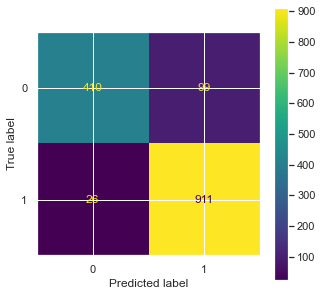

In [53]:
fig, ax = plt.subplots(figsize=(5,5))
plot_confusion_matrix(lr, X_test_scaled, y_test, ax=ax);

plt.savefig("output.jpg")

In [23]:
y_preds_lr = lr.predict(X_test_scaled)
print(classification_report(y_test, y_preds_lr))
print("Accuracy_LR:",metrics.accuracy_score(y_test, y_preds_lr))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       509
           1       0.90      0.97      0.94       937

    accuracy                           0.91      1446
   macro avg       0.92      0.89      0.90      1446
weighted avg       0.92      0.91      0.91      1446

Accuracy: 0.9135546334716459


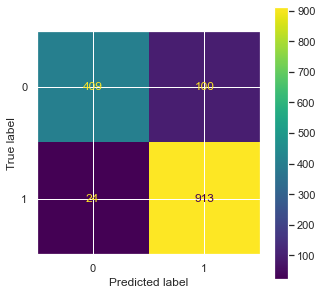

In [55]:
fig, ax = plt.subplots(figsize=(5,5))
plot_confusion_matrix(svm, X_test_scaled, y_test, ax=ax);

plt.savefig("output.jpg")

In [22]:
y_preds_svm = svm.predict(X_test_scaled)
print(classification_report(y_test, y_preds_svm))
print("Accuracy_SVM:",metrics.accuracy_score(y_test, y_preds_svm))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87       509
           1       0.90      0.97      0.94       937

    accuracy                           0.91      1446
   macro avg       0.92      0.89      0.90      1446
weighted avg       0.92      0.91      0.91      1446

Accuracy: 0.9142461964038727


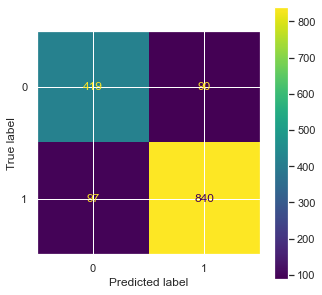

In [57]:
fig, ax = plt.subplots(figsize=(5,5))
plot_confusion_matrix(dtree, X_test_scaled, y_test, ax=ax);

plt.savefig("output.jpg")

In [21]:
y_preds_dtree = dtree.predict(X_test_scaled)
print(classification_report(y_test, y_preds_dtree))
print("Accuracy_Dtree:",metrics.accuracy_score(y_test, y_preds_dtree))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       509
           1       0.90      0.89      0.89       937

    accuracy                           0.86      1446
   macro avg       0.85      0.85      0.85      1446
weighted avg       0.86      0.86      0.86      1446

Accuracy: 0.8630705394190872


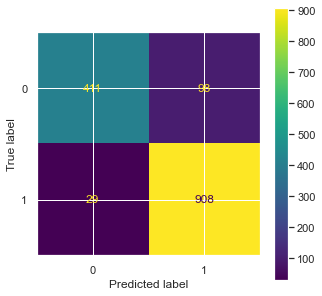

In [59]:
fig, ax = plt.subplots(figsize=(5,5))
plot_confusion_matrix(rf, X_test_scaled, y_test, ax=ax);

plt.savefig("output.jpg")

In [20]:
y_preds_rf = rf.predict(X_test_scaled)
print(classification_report(y_test, y_preds_rf))
print("Accuracy_RF:",metrics.accuracy_score(y_test, y_preds_rf))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       509
           1       0.91      0.96      0.93       937

    accuracy                           0.91      1446
   macro avg       0.91      0.89      0.90      1446
weighted avg       0.91      0.91      0.91      1446

Accuracy: 0.9121715076071922


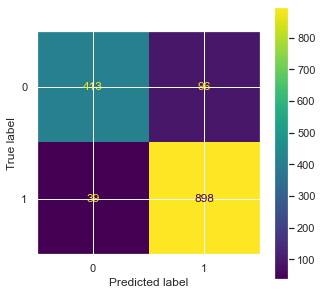

In [61]:
fig, ax = plt.subplots(figsize=(5,5))
plot_confusion_matrix(gbm, X_test_scaled, y_test, ax=ax);

plt.savefig("output.jpg")

In [19]:
y_preds_gbm = gbm.predict(X_test_scaled)
print(classification_report(y_test, y_preds_gbm))
print("Accuracy_XGB:",metrics.accuracy_score(y_test, y_preds_gbm))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       509
           1       0.90      0.96      0.93       937

    accuracy                           0.91      1446
   macro avg       0.91      0.88      0.89      1446
weighted avg       0.91      0.91      0.91      1446

Accuracy: 0.9066390041493776


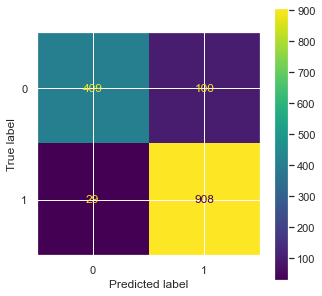

In [63]:
fig, ax = plt.subplots(figsize=(5,5))
plot_confusion_matrix(ada, X_test_scaled, y_test, ax=ax);

plt.savefig("output.jpg")

In [18]:
y_preds_ada = ada.predict(X_test_scaled)
print(classification_report(y_test, y_preds_ada))
print("Accuracy_ADA:",metrics.accuracy_score(y_test, y_preds_ada))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       509
           1       0.90      0.97      0.93       937

    accuracy                           0.91      1446
   macro avg       0.92      0.89      0.90      1446
weighted avg       0.91      0.91      0.91      1446

Accuracy: 0.9107883817427386


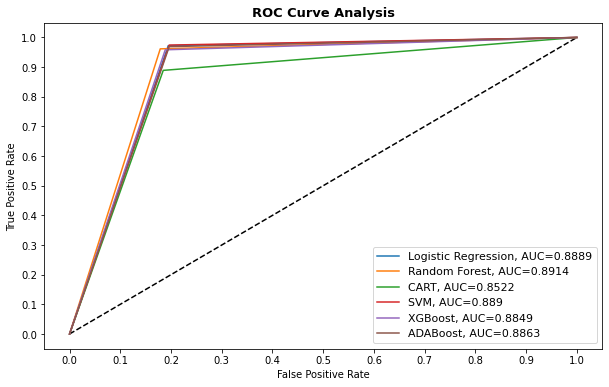

In [80]:
plt.figure(figsize=(10,6))

plt.plot([0,1], [0,1], color='black', linestyle='--')

#Plot logistic regression ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_preds_lr)
auc = round(metrics.roc_auc_score(y_test, y_preds_lr), 4)
plt.plot(fpr,tpr,label= "Logistic Regression, AUC="+str(auc))

#Plot random forest ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_preds_rf)
auc = round(metrics.roc_auc_score(y_test, y_preds_rf), 4)
plt.plot(fpr,tpr,label= "Random Forest, AUC="+str(auc))

#Plot CART ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_preds_dtree)
auc = round(metrics.roc_auc_score(y_test, y_preds_dtree), 4)
plt.plot(fpr,tpr,label= "CART, AUC="+str(auc))

#Plot SVM ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_preds_svm)
auc = round(metrics.roc_auc_score(y_test, y_preds_svm), 4)
plt.plot(fpr,tpr,label= "SVM, AUC="+str(auc))

#Plot XGBoost ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_preds_gbm)
auc = round(metrics.roc_auc_score(y_test, y_preds_gbm), 4)
plt.plot(fpr,tpr,label= "XGBoost, AUC="+str(auc))

#Plot ADABoost ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_preds_ada)
auc = round(metrics.roc_auc_score(y_test, y_preds_ada), 4)
plt.plot(fpr,tpr,label= "ADABoost, AUC="+str(auc))


plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=10)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=10)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=13)
plt.legend(prop={'size':11}, loc='lower right')

plt.savefig("output.jpg")

In [108]:
model_lr = LogisticRegression().fit(X_train, y_train)
probs_lr = model_lr.predict_proba(X_test)[:, 1]

model_dtree = DecisionTreeClassifier().fit(X_train, y_train)
probs_dtree = model_dtree.predict_proba(X_test)[:, 1]

model_rf = RandomForestClassifier().fit(X_train, y_train)
probs_rf = model_rf.predict_proba(X_test)[:, 1]

model_gbm = xgb.XGBClassifier().fit(X_train, y_train)
probs_gbm = model_gbm.predict_proba(X_test)[:, 1]

model_ada = AdaBoostClassifier().fit(X_train, y_train)
probs_ada = model_ada.predict_proba(X_test)[:, 1]

model_svm = SVC().fit(X_train, y_train)
probs_svm = model_svm.predict_proba(X_test)[:, 1]

[03:44:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


AttributeError: predict_proba is not available when  probability=False

In [109]:
#Create precision recall curve
y_test_int = y_test.replace({1, 0})

baseline_model = sum(y_test_int == 1) / len(y_test_int)

precision_lr, recall_lr, _ = precision_recall_curve(y_test_int, probs_lr)
auc_lr = auc(recall_lr, precision_lr)

precision_dtree, recall_dt, _ = precision_recall_curve(y_test_int, probs_dtree)
auc_dtree = auc(recall_dtree, precision_dtree)

precision_rf, recall_rf, _ = precision_recall_curve(y_test_int, probs_rf)
auc_rf = auc(recall_rf, precision_rf)

precision_svm, recall_xg, _ = precision_recall_curve(y_test_int, probs_svm)
auc_svm = auc(recall_svm, precision_svm)

precision_ada, recall_ada, _ = precision_recall_curve(y_test_int, probs_ada)
auc_ada = auc(recall_ada, precision_ada)

precision_gbm, recall_gbm, _ = precision_recall_curve(y_test_int, probs_gbm)
auc_gbm = auc(recall_gbm, precision_gbm)

plt.figure(figsize=(12, 7))
plt.plot(recall_lr, precision_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(recall_dtree, precision_dtree, label=f'AUC (Decision Tree) = {auc_dtree:.2f}')
plt.plot(recall_rf, precision_rf, label=f'AUC (Random Forest) = {auc_rf:.2f}')
plt.plot(recall_svm, precision_svm, label=f'AUC (Support Vector Machine) = {auc_svm:.2f}')
plt.plot(recall_gbm, precision_gbm, label=f'AUC (XGBoost) = {auc_gbm:.2f}')
plt.plot(recall_ada, precision_ada, label=f'AUC (AdaBoostBoost) = {auc_ada:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend(prop={'size':11}, loc='lower right');
plt.show()

plt.savefig("output.jpg")

TypeError: 'numpy.float64' object is not callable

In [66]:
# Define parameter values that should be searched
bootstrap = [True, False]
max_features = ['auto','sqrt']
min_samples_leaf = [1,2,4]
min_samples_split = [2,5,10]
n_estimators = [50,100,150,200]
max_depth = [4,6,10,12, None]

In [67]:
# Specify "parameter distributions" rather than a "parameter grid"

param_dist = dict(n_estimators=n_estimators, max_depth = max_depth, bootstrap=bootstrap,
                  min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split,
                  max_features=max_features)
print(param_dist)

{'n_estimators': [50, 100, 150, 200], 'max_depth': [4, 6, 10, 12, None], 'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt']}


In [68]:
# n_iter controls the number of searches

rand = RandomizedSearchCV(RandomForestClassifier(), param_dist, cv=10, scoring='accuracy',
                          n_iter=10, random_state=42)
rand.fit(X_train_scaled, y_train)

# Uncomment line below to print
# rand.cv_results_

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [4, 6, 10, 12, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, scoring='accuracy')

In [69]:
def get_best_model(model_grid):
    best_k = model_grid.cv_results_['rank_test_score'][0]
    print (f"Mean score: {model_grid.cv_results_['mean_test_score'][best_k]}",
           f"Std: {model_grid.cv_results_['std_test_score'][best_k]}")

In [70]:
# Examine the best model
print(rand.best_score_)
print(rand.best_params_)
get_best_model(rand)

0.9155639041730079
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
Mean score: 0.9137168612509446 Std: 0.011925836749683782


In [71]:
print("Random Forest with the following parameters:\n")
print(rand.best_params_)

Random Forest with the following parameters:

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}


In [72]:
#Checking for overfitting#
# features and target
X = rtd_1.loc[:,'HSGPA':'SecondYrEarnedCreditHours']
y = rtd_1['STEMDegreeCompletion']

# encode categorical

X = encode_cats(categoricals, numericals)

# Split data
X_train, X_val, X_test, y_train, y_val, y_test = train_test_val_split(X, y)

# Scale
X_train_scaled, X_val_scaled, X_test_scaled = scale_data(X_train, X_val, X_test)

# Model score
rf = model_score('RF', RandomForestClassifier(**rand.best_params_),
                 X_train_scaled, X_val_scaled, X_test_scaled,
                 y_train, y_val, y_test, test=True)

Calculating validation score...
RF accuracy score: 0.9107

Calculating test score...
RF accuracy score: 0.9142

